In [1]:
import json, os, sys

from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

project_dir = os.path.abspath("..")
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)
    
import utils
import result_helper


sns.set(style="whitegrid")

In [2]:
skadi_job_paths = list(Path("../data/experiments-skadi/").glob("**/job-info.json"))
skadi_job_paths = [p for p in skadi_job_paths if "no_bias_few_steps" in str(p)]

job_paths = skadi_job_paths# + odin_job_paths

df_data = result_helper.get_result_summary(job_paths)

cols_irrelavant = [
    "started_at", "completed_at", "precision_score", "recall_score", "f1_score", "random_seed",
    'experiment_type', 'experiment_name', 'component_size', 'variance', 'label_noise_proba',
    'allow_self_loops', 'distance_metric', 'job_path', 'duration_secs'
]
cols_relevant = list(set(df_data.columns) - set(cols_irrelavant))

## Introduction

### Purpose of the experiments

- Determine how to parameterize the data generator and the algorithm in order to fully recover the mixtures
  - How many steps should the random walker take before it stops?
  - What is the minimum separation?
  - How does the labelling information influence the performance?



### Data generation

- Place the Gaussian centers on a $k$-dimensional simplex i.e., standard unit basis vectors in $k$ dimensions
  - Number of Gaussian components $k$ is the same as the number of dimensions $d$
- Move the centers by multiplying them with a factor: `min_distance`.
- Number of points in each Gaussian component: 50
- Variance in each component: 1
- No label noise added - to figure out how the algorithm behaves in the best case
- No self-loops


## No labelling information $\beta = 1$

### Impact of few steps on separation $k^{\frac{1}{8}} $

Experiment parameters:
- $\beta = 1$
- Number of steps: 2-4
- Separation: $k^{\frac{1}{8}}$

accuracy_score                                    
n_dim              10       50       100     200       300
n_steps                                                   
2               0.3040  0.09752  0.06560  0.0509  0.042893
3               0.2676  0.09672  0.06608  0.0502  0.043680
4               0.2632  0.09232  0.06776  0.0504  0.043973

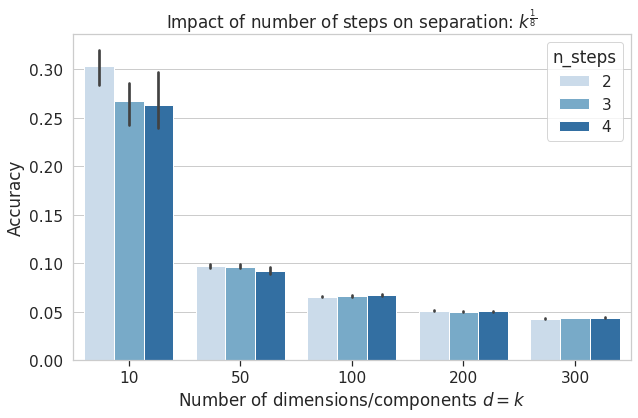

In [3]:
filter1 = df_data.experiment_name == "no_bias_few_steps_04"
df_ff = df_data[(filter1)].copy()

df_data_filtered = df_ff.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        x="n_dim",y="accuracy_score", hue="n_steps",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title("Impact of number of steps on separation: $k^{\\frac{1}{8}} $");
    # ax.set_ylim([0, 1])

df_grouped = df_ff.groupby(["n_dim", "n_steps"])[["accuracy_score"]].mean().reset_index()
df_grouped.pivot(index=["n_steps"], columns=["n_dim"], values=["accuracy_score"])

### Impact of few steps on separation $k^{\frac{1}{4}} $

Experiment parameters:
- $\beta = 1$
- Number of steps: 2-4
- Separation: $k^{\frac{1}{4}}$

accuracy_score                                  
n_dim              10      50      100     200       300
n_steps                                                 
2                0.368  0.1436  0.1050  0.0680  0.056600
3                0.384  0.1436  0.0984  0.0673  0.054133
4                0.288  0.1436  0.0938  0.0677  0.054867

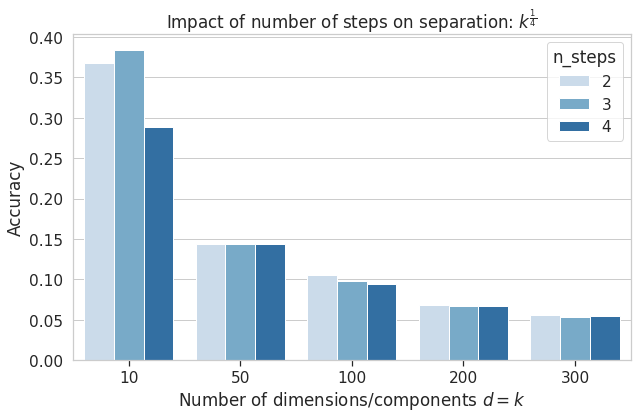

In [4]:
filter1 = df_data.experiment_name == "no_bias_few_steps_02"
df_ff = df_data[(filter1)].copy()

df_data_filtered = df_ff.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        x="n_dim",y="accuracy_score", hue="n_steps",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title("Impact of number of steps on separation: $k^{\\frac{1}{4}} $");
    # ax.set_ylim([0, 1])

df_grouped = df_ff.groupby(["n_dim", "n_steps"])[["accuracy_score"]].mean().reset_index()
df_grouped.pivot(index=["n_steps"], columns=["n_dim"], values=["accuracy_score"])

### Impact of few steps on separation $ (\log_{10}{k}) k^{\frac{1}{4}} $

Experiment parameters:
- $\beta = 1$
- Number of steps: 2-4
- Separation: $(\log_{10}{k}) k^{\frac{1}{4}}$

accuracy_score                                     
n_dim              10       50       100      200       300
n_steps                                                    
2               0.4388  0.92600  0.95864  0.95898  0.949320
3               0.3984  0.88224  0.96700  0.95584  0.953293
4               0.3656  0.76712  0.93996  0.95922  0.951280

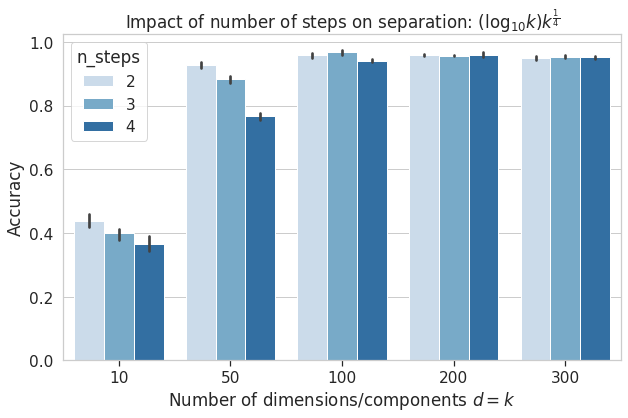

In [5]:
filter1 = df_data.experiment_name == "no_bias_few_steps_03"
df_ff = df_data[(filter1)].copy()

df_data_filtered = df_ff.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        x="n_dim",y="accuracy_score", hue="n_steps",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title("Impact of number of steps on separation: $(\log_{10}{k}) k^{\\frac{1}{4}} $");
    # ax.set_ylim([0, 1])

df_grouped = df_ff.groupby(["n_dim", "n_steps"])[["accuracy_score"]].mean().reset_index()
df_grouped.pivot(index=["n_steps"], columns=["n_dim"], values=["accuracy_score"])

### Impact of few steps on separation $ (\ln{k}) k^{\frac{1}{4}} $

Experiment parameters:
- $\beta = 1$
- Number of steps: 2-4
- Separation: $(\ln{k}) k^{\frac{1}{4}}$

accuracy_score                    
n_dim              10   50   100  200  300
n_steps                                   
2             0.988667  1.0  1.0  1.0  1.0
3             0.981333  1.0  1.0  1.0  1.0
4             0.970667  1.0  1.0  1.0  1.0

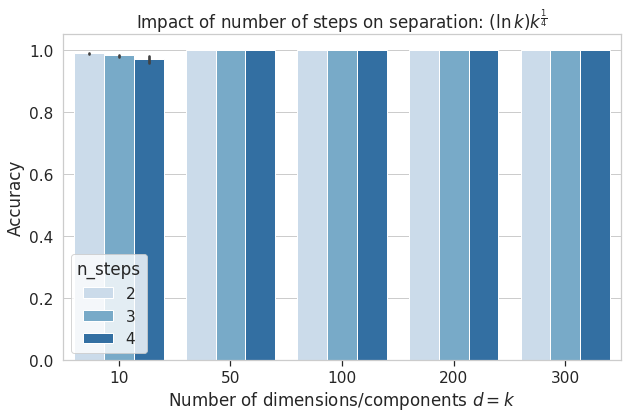

In [6]:
filter1 = df_data.experiment_name == "no_bias_few_steps_01"
df_ff = df_data[(filter1)].copy()

df_data_filtered = df_ff.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        x="n_dim",y="accuracy_score", hue="n_steps",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title("Impact of number of steps on separation: $(\ln{k}) k^{\\frac{1}{4}} $");
    # ax.set_ylim([0, 1])

df_grouped = df_ff.groupby(["n_dim", "n_steps"])[["accuracy_score"]].mean().reset_index()
df_grouped.pivot(index=["n_steps"], columns=["n_dim"], values=["accuracy_score"])